In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [51]:
Sdataset=pd.read_csv(r'C:\Users\DELL\Desktop\SP\Ibrahim\marketplace.csv')
Sdataset.head()

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000.0,1.0,0.0,0.0,0.0,95.0,37.0,74.0
1,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0
2,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900.0,16.0,0.0,0.0,0.0,96.0,12.0,19.0
3,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500.0,5.0,0.0,0.0,0.0,99.0,42.0,63.0
4,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000.0,999999.0,0.0,0.0,3.0,100.0,18.0,82.0


In [52]:
Sdataset.shape

(26015, 15)

In [53]:
Sdataset.replace("?", np.nan, inplace = True)
Sdataset.head(5)

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000.0,1.0,0.0,0.0,0.0,95.0,37.0,74.0
1,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0
2,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900.0,16.0,0.0,0.0,0.0,96.0,12.0,19.0
3,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500.0,5.0,0.0,0.0,0.0,99.0,42.0,63.0
4,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000.0,999999.0,0.0,0.0,3.0,100.0,18.0,82.0


In [54]:
Sdataset.isnull().sum()

sku_name          1
product_id        1
merchant_code     8
merchant_badge    1
product_type      1
merchant_city     1
cod               1
price             1
stock             1
daily_gmv         1
daily_sold        1
daily_view        1
rating            1
total_review      1
total_sold        1
dtype: int64

In [55]:
Sdataset=Sdataset.dropna()
Sdataset.isnull().sum()

sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

In [56]:
Sdataset.dtypes

sku_name           object
product_id         object
merchant_code     float64
merchant_badge     object
product_type       object
merchant_city      object
cod                object
price             float64
stock             float64
daily_gmv         float64
daily_sold        float64
daily_view        float64
rating            float64
total_review      float64
total_sold        float64
dtype: object

In [57]:
Sdataset[["merchant_code", "stock"]] = Sdataset[["merchant_code", "stock"]].astype("int64")
Sdataset[["daily_gmv", "daily_sold", "daily_view"]] = Sdataset[["daily_gmv", "daily_sold", "daily_view"]].astype("int64")
Sdataset[["rating", "total_review","total_sold"]] = Sdataset[["rating", "total_review","total_sold"]].astype("int64")

In [58]:
Sdataset.dtypes

sku_name           object
product_id         object
merchant_code       int64
merchant_badge     object
product_type       object
merchant_city      object
cod                object
price             float64
stock               int64
daily_gmv           int64
daily_sold          int64
daily_view          int64
rating              int64
total_review        int64
total_sold          int64
dtype: object

In [59]:
Sdataset.drop(['product_id','merchant_code'], axis = 1, inplace = True)

In [60]:
Sdataset.describe()

,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
count,2.600700e+04,26007.000000,2.600700e+04,26007.000000,26007.000000,26007.000000,26007.000000,26007.000000
mean,3.890975e+06,344569.522513,1.582571e+06,0.737455,58.829238,98.342985,46.354174,152.456608
std,3.869161e+06,474109.701005,1.603929e+07,7.454425,473.153788,5.452142,91.159704,321.406748
min,5.350000e+05,0.000000,-2.342700e+08,-82.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000e+06,4.000000,0.000000e+00,0.000000,2.000000,98.000000,10.000000,27.000000
50%,2.599999e+06,37.000000,0.000000e+00,0.000000,5.000000,100.000000,24.000000,63.000000
75%,4.094950e+06,999972.000000,0.000000e+00,0.000000,21.000000,100.000000,44.000000,144.000000
max,5.000000e+07,999999.000000,9.415350e+08,441.000000,38993.000000,100.000000,2842.000000,7724.000000


In [12]:
Sdataset.describe(include=['object'])

,sku_name,merchant_badge,product_type,merchant_city,cod
count,26007,26007,26007,26007,26007
unique,11391,3,361,136,2
top,Apple Iphone 7 32Gb Garansi Distributor 1 tahun,PM,Realme 6,Kota Administrasi Jakarta Barat,False
freq,33,20347,2161,4676,25715


In [13]:
Sdataset.corr()

,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
price,1.000000,0.156706,-0.025671,-0.044618,-0.008936,0.061041,-0.147269,-0.191556
stock,0.156706,1.000000,-0.063246,-0.064972,-0.075292,0.033286,-0.134122,-0.174839
daily_gmv,-0.025671,-0.063246,1.000000,0.880633,0.676940,0.003093,0.157915,0.190790
daily_sold,-0.044618,-0.064972,0.880633,1.000000,0.537999,-0.001377,0.162829,0.232260
daily_view,-0.008936,-0.075292,0.676940,0.537999,1.000000,-0.008496,0.222010,0.177663
rating,0.061041,0.033286,0.003093,-0.001377,-0.008496,1.000000,-0.060147,-0.043073
total_review,-0.147269,-0.134122,0.157915,0.162829,0.222010,-0.060147,1.000000,0.782728
total_sold,-0.191556,-0.174839,0.190790,0.232260,0.177663,-0.043073,0.782728,1.000000


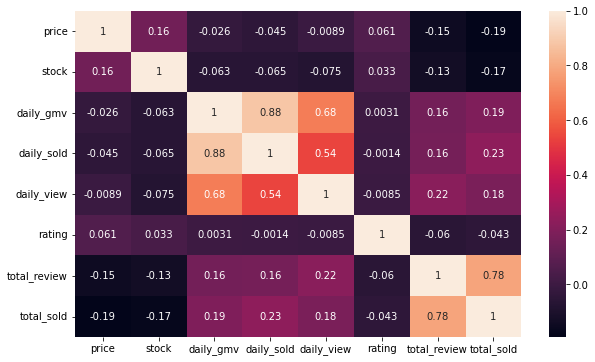

In [14]:
plt.figure(figsize=(10,6))
crltn=Sdataset.corr()
sns.heatmap(crltn,annot=True)
plt.show()

<AxesSubplot:xlabel='stock', ylabel='price'>

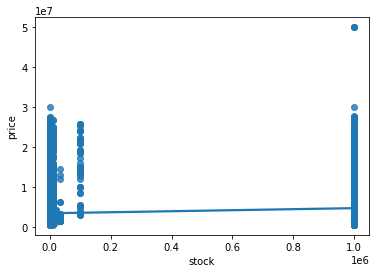

In [15]:
sns.regplot(x="stock", y="price", data=Sdataset)

In [16]:
pearson_coef, p_value = stats.pearsonr(Sdataset['stock'], Sdataset['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.15670582514743875  with a P-value of P = 1.2530450526696903e-142


<AxesSubplot:xlabel='total_review', ylabel='price'>

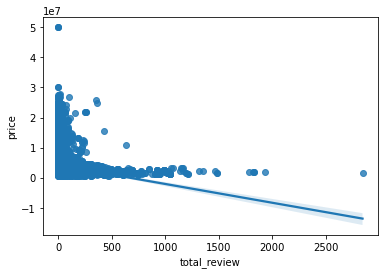

In [17]:
sns.regplot(x="total_review", y="price", data=Sdataset)

In [18]:
pearson_coef, p_value = stats.pearsonr(Sdataset['total_review'], Sdataset['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.14726928178529652  with a P-value of P = 5.085032189186176e-126


<AxesSubplot:xlabel='total_sold', ylabel='price'>

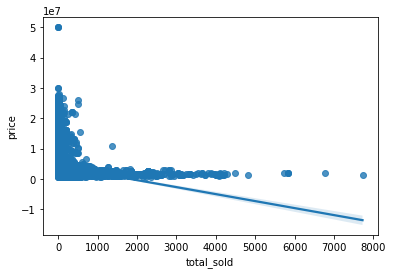

In [19]:
sns.regplot(x="total_sold", y="price", data=Sdataset)

In [20]:
pearson_coef, p_value = stats.pearsonr(Sdataset['total_sold'], Sdataset['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.19155561787307618  with a P-value of P = 2.0377233082803473e-213


<AxesSubplot:xlabel='daily_gmv', ylabel='price'>

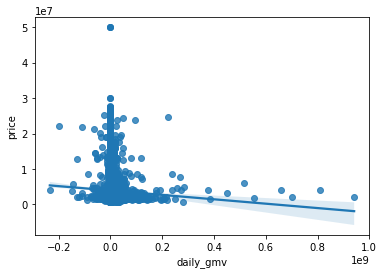

In [21]:
sns.regplot(x="daily_gmv", y="price", data=Sdataset)

In [22]:
pearson_coef, p_value = stats.pearsonr(Sdataset['daily_gmv'], Sdataset['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.025670532824444488  with a P-value of P = 3.4686785341272326e-05


<AxesSubplot:xlabel='daily_sold', ylabel='price'>

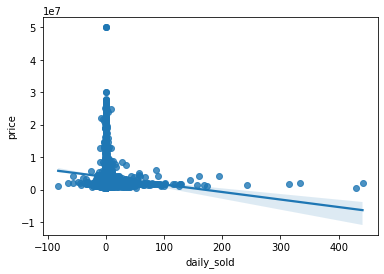

In [23]:
sns.regplot(x="daily_sold", y="price", data=Sdataset)

In [24]:
pearson_coef, p_value = stats.pearsonr(Sdataset['daily_sold'], Sdataset['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.044618341905711595  with a P-value of P = 6.078981827468378e-13


<AxesSubplot:xlabel='daily_view', ylabel='price'>

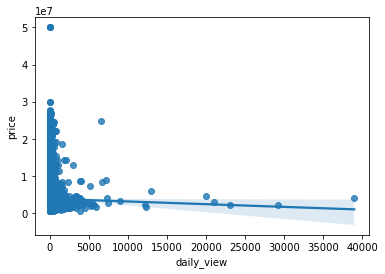

In [25]:
sns.regplot(x="daily_view", y="price", data=Sdataset)

In [26]:
pearson_coef, p_value = stats.pearsonr(Sdataset['daily_view'], Sdataset['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.008936479721898507  with a P-value of P = 0.14955148355665476


<AxesSubplot:xlabel='rating', ylabel='price'>

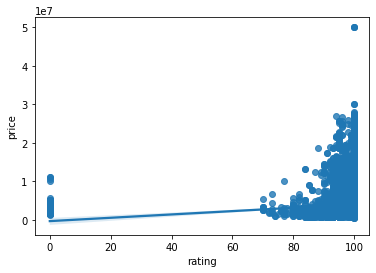

In [27]:
sns.regplot(x="rating", y="price", data=Sdataset)

In [28]:
pearson_coef, p_value = stats.pearsonr(Sdataset['rating'], Sdataset['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.06104145277435303  with a P-value of P = 6.674139159782571e-23


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x864 with 0 Axes>

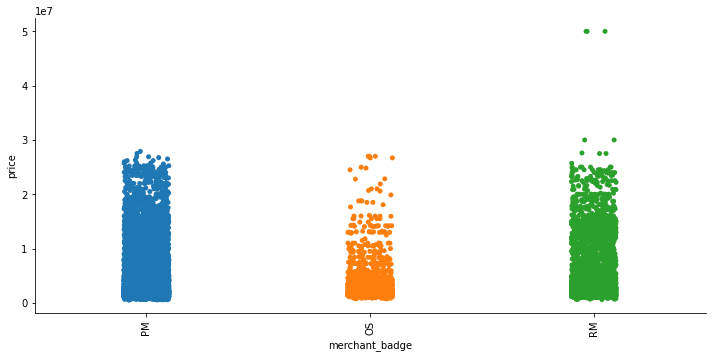

In [29]:
plt.figure(figsize=(10,12))
sns.catplot(x="merchant_badge", y="price", data=Sdataset,height=5, aspect=2)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x864 with 0 Axes>

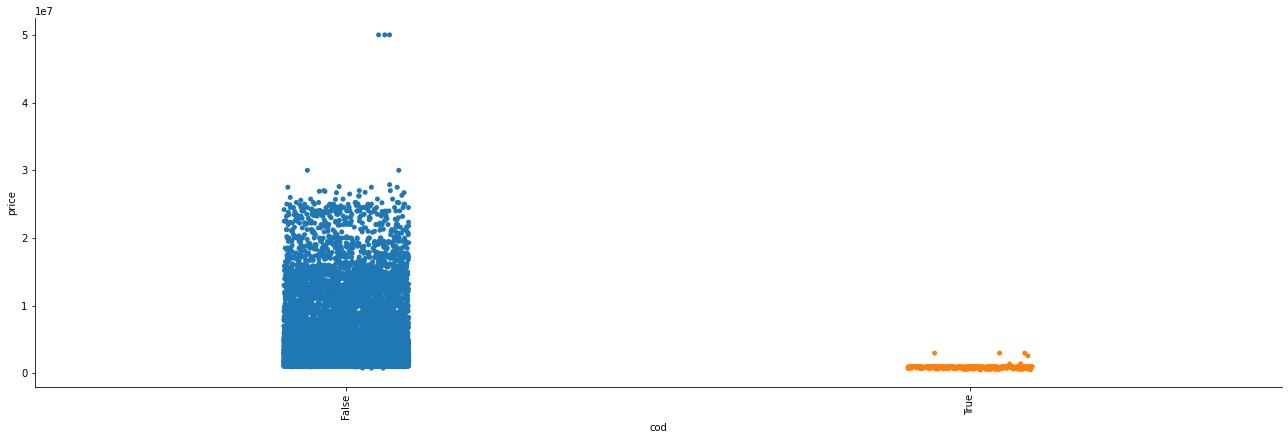

In [30]:
plt.figure(figsize=(10,12))
sns.catplot(x="cod", y="price", data=Sdataset,height=6, aspect=3)
plt.xticks(rotation=90)
plt.show

In [61]:
# Hdataset['price'] = Hdataset['price']/Hdataset['price'].max()
# Hdataset['sqft_living'] = Hdataset['sqft_living']/Hdataset['sqft_living'].max()
# Hdataset['sqft_above'] = Hdataset['sqft_above']/Hdataset['sqft_above'].max()
# Hdataset['sqft_basement'] = Hdataset['sqft_basement']/Hdataset['sqft_basement'].max()
# Hdataset['sqft_lot'] = Hdataset['sqft_lot']/Hdataset['sqft_lot'].max()

In [62]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Sdataset.sku_name = labelencoder.fit_transform(Sdataset.sku_name)
Sdataset.product_type = labelencoder.fit_transform(Sdataset.product_type)
Sdataset.cod = labelencoder.fit_transform(Sdataset.cod)
Sdataset.merchant_badge = labelencoder.fit_transform(Sdataset.merchant_badge)

In [63]:
# # merge data frame "df" and "dummy_variable_1" 
# Sdataset = pd.concat([Sdataset, Encode1], axis=1)

# # drop original column "fuel-type" from "df"
# Sdataset.drop("sku_name", axis = 1, inplace=True)

In [64]:
# Encode2 = pd.get_dummies(Sdataset["product_type"])
# Encode2.head()

In [65]:
# # merge data frame "df" and "dummy_variable_1" 
# Sdataset = pd.concat([Sdataset, Encode2], axis=1)

# # drop original column "fuel-type" from "df"
# Sdataset.drop("product_type", axis = 1, inplace=True)

In [66]:
# Encode3 = pd.get_dummies(Sdataset["cod"])
# Encode3.head()

In [67]:
# # merge data frame "df" and "dummy_variable_1" 
# Sdataset = pd.concat([Sdataset, Encode3], axis=1)

# # drop original column "fuel-type" from "df"
# Sdataset.drop("cod", axis = 1, inplace=True)
Sdataset.drop(['merchant_city','daily_view'], axis = 1, inplace = True)

In [68]:
Sdataset.head()

,sku_name,merchant_badge,product_type,cod,price,stock,daily_gmv,daily_sold,rating,total_review,total_sold
0,1263,1,87,0,4500000.0,1,0,0,95,37,74
1,1425,0,87,0,4999000.0,5,0,0,0,0,2
2,1258,1,87,0,4589900.0,16,0,0,96,12,19
3,1262,0,87,0,4698500.0,5,0,0,99,42,63
4,10610,2,105,1,1000000.0,999999,0,0,100,18,82


In [69]:
x=Sdataset.iloc[:,0:11]
x.drop(['price'], axis = 1, inplace = True)
x

,sku_name,merchant_badge,product_type,cod,stock,daily_gmv,daily_sold,rating,total_review,total_sold
0,1263,1,87,0,1,0,0,95,37,74
1,1425,0,87,0,5,0,0,0,0,2
2,1258,1,87,0,16,0,0,96,12,19
3,1262,0,87,0,5,0,0,99,42,63
4,10610,2,105,1,999999,0,0,100,18,82
...,...,...,...,...,...,...,...,...,...,...
26009,791,0,48,0,5,0,0,96,99,262
26010,802,0,48,0,9,4090000,2,98,16,29
26011,805,0,48,0,5,0,0,98,123,393
26012,757,0,48,0,10,4170000,2,96,48,126


In [70]:
y=Sdataset.iloc[:,4]
y

0        4500000.0
1        4999000.0
2        4589900.0
3        4698500.0
4        1000000.0
           ...    
26009    2300000.0
26010    2045000.0
26011    1550000.0
26012    2085000.0
26013    2085000.0
Name: price, Length: 26007, dtype: float64

In [71]:
lr = LinearRegression()

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [73]:
model=lr.fit(x_train,y_train)

In [74]:
y_predict = lr.predict(x_test)

In [75]:
R1=lr.score(x_train,y_train)
print('The R-square for Multiple Linear regression is: ',R1)

The R-square for Multiple Linear regression is:  0.26070662359146746


In [77]:
mae1=mean_absolute_error(y_test, y_predict)
print('The mean absolute error for Multiple Linear Regression: ',mae1)

The mean absolute error for Multiple Linear Regression:  2205445.2304134225


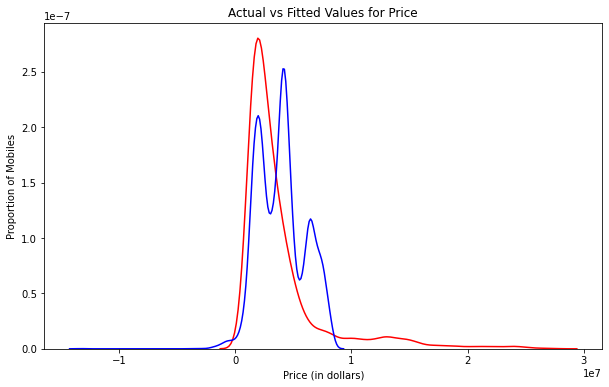

In [78]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Mobiles')

plt.show()
plt.close()

In [79]:
rfr = RandomForestRegressor()
model=rfr.fit(x_train,y_train)

In [80]:
y_predict2 = rfr.predict(x_test)

In [81]:
R2= rfr.score(x_train,y_train)
print('The R-square for Random Forest is: ',R2)

The R-square for Random Forest is:  0.9905787363575557


In [83]:
mae2=mean_absolute_error(y_test, y_predict2)
print('The mean absolute error for Random Forest: ',mae2)

The mean absolute error for Random Forest:  363099.84477351373


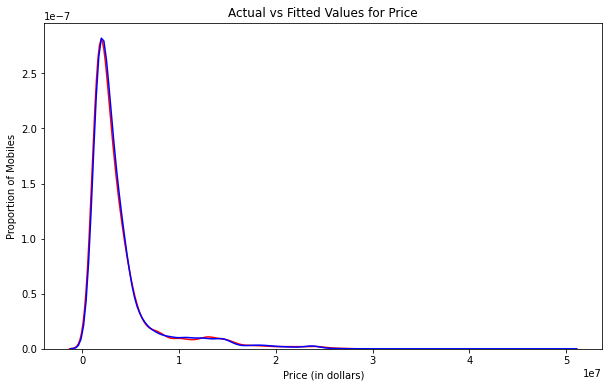

In [84]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Mobiles')

plt.show()
plt.close()

In [85]:
models = [('Random Forest', R2, mae2),
          ('Multiple Linear Regression', R1,mae1),
         ]

In [86]:
pred = pd.DataFrame(data = models, columns=['Model', 'R-Square', 'Mean absolute error'])
pred

,Model,R-Square,Mean absolute error
0,Random Forest,0.990579,3.630998e+05
1,Multiple Linear Regression,0.260707,2.205445e+06


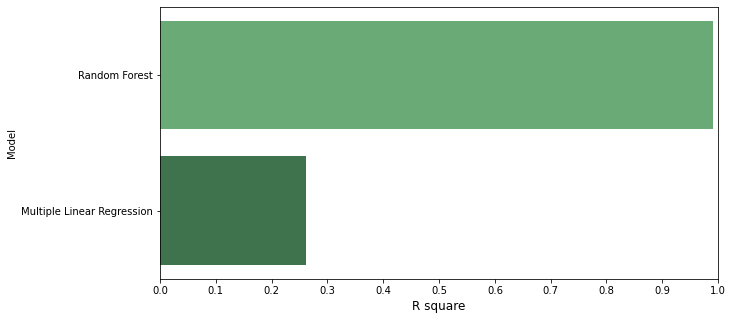

In [87]:
pred.sort_values(by=['R-Square'], ascending=False, inplace=True)

f, axes = plt.subplots(1,figsize=(10,5))

sns.barplot(x='R-Square', y='Model', data = pred, palette='Greens_d', ax = axes)
#axes[0].set(xlabel='Region', ylabel='Charges')
axes.set_xlabel('R square', size=12)
axes.set_ylabel('Model')
axes.set_xlim(0,1.0)
axes.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

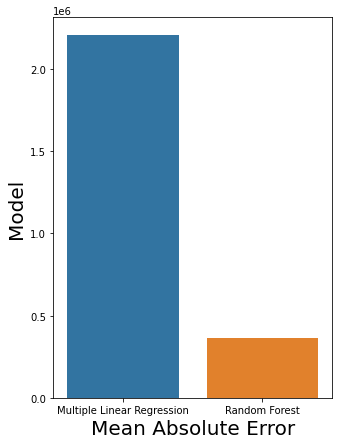

In [90]:
pred.sort_values(by=(['Mean absolute error']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(5,7))
sns.barplot(x = pred['Model'], y=pred['Mean absolute error'], ax = axe)
axe.set_xlabel('Mean Absolute Error', size=20)
axe.set_ylabel('Model', size=20)

plt.show()